## Exercise 02 - Best charts to represent different data or dataset types.

Each type of data or datasets is best visualized by certain kinds of charts, depending on both the targeted audience as well as the personal preferences of the data visualizer. In this exercise you will first simulate different types of data and datasets in python. Randomizations are useful to understand certain statistical concepts and also as a basis for random sampling, which may be required when dealing with big data. Based on these simulated data, the exercise will consist on choosing the type of chart that you find more adequate to represent the different types of data and datasets.

The objectives of this exercise are to:
1. identify each type of variables and tables that were created.

2. try your best to interpret each line of the code provided by inserting a note in front of each line (it might be useful to create a jupiter notebook from the markdown file)

2. based on these simulated data, draw sketches of the charts that you find more adequate to represent the different types of data and datasets. You should identify the different axis of the plot, if applicable.

You will use two modules that provide pseudo-random number generators to implement random sampling routines. Have a look [here](https://docs.python.org/3/library/random.html) (random module) and [here](https://numpy.org/doc/stable/reference/random/index.html) (numpy.random module). Both allow to simulate data and take random samples, although np.random allows more pseudo-random generator methods to be implemented.

To run the simulations, you should first import pandas, numpy and random modules (in case you still did not install these modules, you will need to install beforehand).

In [2]:
import pandas as pd
import numpy as np
import random

# Simulate var1

# to create an empty list, we use empty square brackets
var1 = []

# random() function is used to generate random numbers in Python. Not actually random, rather this is used to generate pseudo-random numbers
# seed function is used to save the state of a random function, so that it can generate same random numbers on multiple executions of the code on the same machine or on different machines (for a specific seed value). The seed value is the previous value number generated by the generator. For the first time when there is no previous value, it uses current system time
random.seed(24)

# create a list with some type of land use
levels = ["Permanent crops", "Irrigated crops", "Managed Forest", "Natural Forest", "Agro-Forestry system", "Urban", "Pasture", "Shrubland" ]

# 'for _ in' is used when we don't need to know the current value of the variable
# why is a loop needed? a 'for' loop is used for iterating over a sequence
# the sample() method returns a list with a randomly selection of a specified number of items from a sequence
# Syntax : random.sample(sequence, k) -> sequence can be a list, k is the length of a sample
for _ in range(100): 
    var1 += random.sample(levels, 1) # var1.append(random.sample(levels, 1)) would also work

# just to test it
# print("With list:" , random.sample(levels, 1))
# print (var1)
# print (len(var1))
# var1 is a list

In [3]:
# Simulate var2

np.random.seed(24) # optional: used to fix the seed of the pseudo-random number generator (use any number of your choice)

# With the help of numpy.random.uniform() method, we can get the random samples from uniform distribution and returns the random samples as numpy array by using this method
# Syntax : numpy.random.uniform(low=0.0, high=1.0, size=None)
# Return : Return the random samples as numpy array.
var2 = np.random.uniform(0, 100, 100)

# just to test it
# print(var2)
# var2 is an array

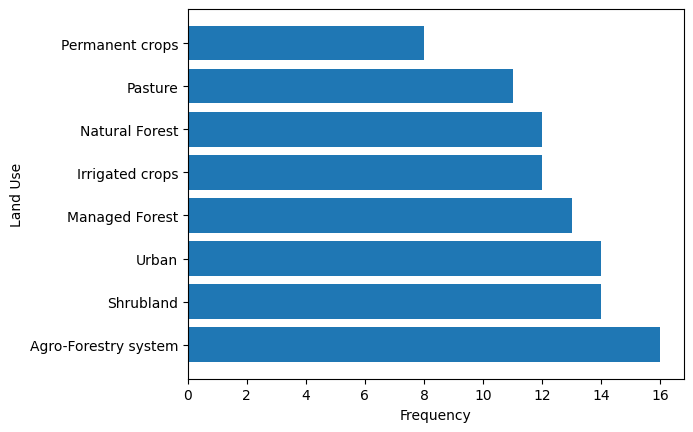

In [4]:
# Simulate table1

# Pandas DataFrame is a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns
# value_counts returns a Series containing counts of unique rows in the DataFrame; sort by frequencies
table1 = pd.DataFrame(var1).value_counts(sort=True)

# set the name of the row axis as 'landuse'
table1 = table1.rename_axis("Land Use")

# the name to use for the column containing the original Series values was defined as 'Frequency'
table1 = table1.reset_index(name="Frequency")

# just to test it
# print(table1)

# let's create a graph to represent the table 1

import matplotlib.pyplot as plt

x_axis = ['Agro-Forestry system','Shrubland','Urban','Managed Forest','Irrigated crops','Natural Forest','Pasture','Permanent crops']
y_axis = [16,14,14,13,12,12,11,8]
plt.barh(x_axis, y_axis)
plt.xlabel('Frequency')
plt.ylabel('Land Use')
plt.show()

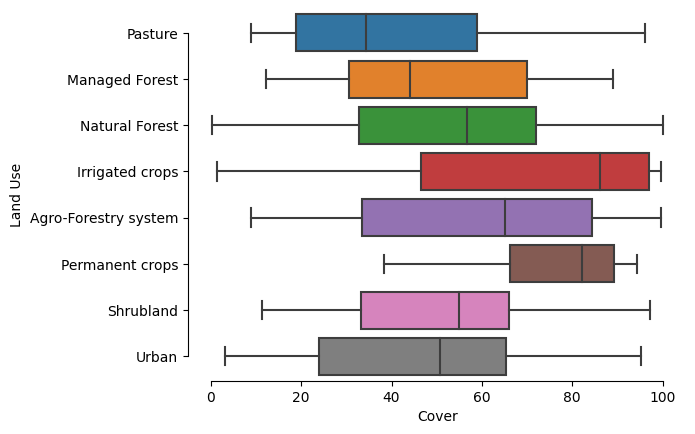

In [5]:
# Matplotlib is mainly deployed for basic plotting. Visualization using Matplotlib generally consists of bars, pies, lines, scatter plots and so on
# Seaborn, on the other hand, provides a variety of visualization patterns. It uses fewer syntax and has easily interesting default themes. It specializes in statistics visualization and is used if one has to summarize data in visualizations and also show the distribution in the data. 

import seaborn as sns
# Simulate table2

table2 = pd.DataFrame(list(zip(var1, var2)), columns = ["Land Use", "Cover"])

# just to test it
# print(table2)
# print(tuple(zip(var1,var2)))
# Note: The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together, etc. The tuple() function displays a readable version of the result - try running: print(tuple(zip(var1,var2)))

# let's create a graph
sns.boxplot(x="Cover", y="Land Use",data=table2)
sns.despine(offset=1, trim=True)

<AxesSubplot: xlabel='Year', ylabel='Temperature'>

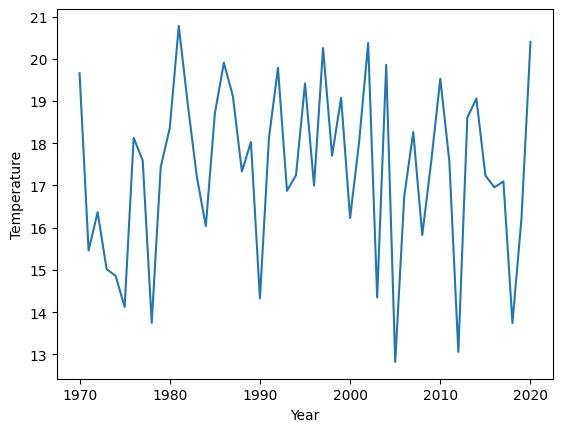

In [6]:
# Simulate table3

np.random.seed(24) # optional: used to fix the seed of the pseudo-random number generator (use any number of your choice)

# create a list from 1970 to 2021 (not including)
year = list(range(1970,2021))

# draw random samples from a normal (Gaussian) distribution
# Syntax np.random.normal(loc=0.0, scale=1.0, size=None) -> where loc is the mean (“centre”) of the distribution, scale is the standard deviation (spread or “width”) of the distribution (must be non-negative), size is the output shape
temp = np.random.normal(17,2,51)

# get the list of tuples from two lists and merge them by using zip()
table3 = pd.DataFrame(list(zip(year, temp)), columns = ["Year", "Temperature"])

# just to teste it 
# print(table3)

# let's get a graph
sns.lineplot(data=table3, x="Year", y="Temperature", markers=False, orient='x')


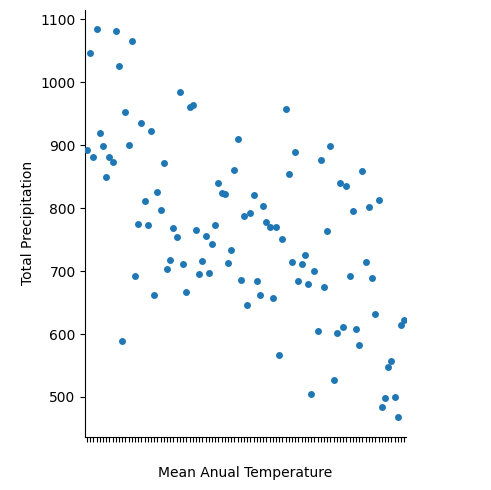

In [7]:
# Simulate table4

# create arrays
xx = np.array([16,21])
yy = np.array([300, 1200])

# find the mean and standard deviation for each xx and yy
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = -0.7 # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] # covariance matrix

# draw random samples from a multivariate normal distribution
# random.multivariate_normal(mean, cov, size=None) -> 100 is the size of our sample
table4 = pd.DataFrame(np.random.multivariate_normal(means, covs, 100), columns = ["Mean Anual Temperature", "Total Precipitation"])

# just to test it
#print(table4)

# let's get a graph
sns.catplot(data=table4, x="Mean Anual Temperature", y="Total Precipitation")
# so that we don't see the huge amount of values for the Mean Anual Temperature, I used this, it sets the color of tick labels as white to hide it
plt.xticks(color='w') 
plt.show()

C:\Users\joana\AppData\Local\Temp\ipykernel_14772\2962396944.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table5=table5.pivot('Year','Landuse','Cover')


<AxesSubplot: xlabel='Landuse', ylabel='Year'>

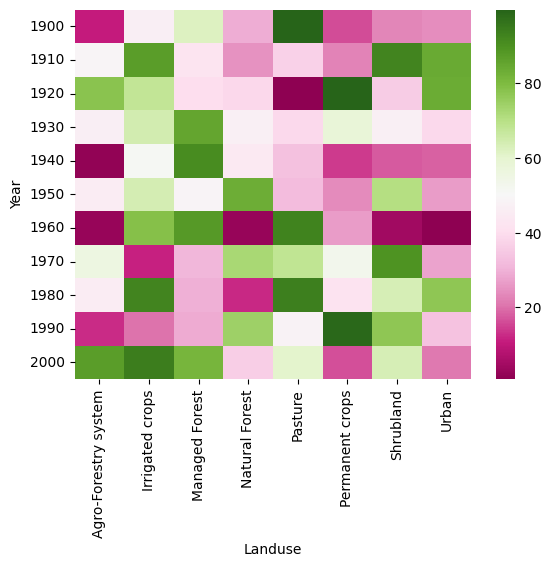

In [9]:
# Simulate table5

# create series of lists of years from 1900 to 2010
col1 = pd.Series(list(range(1900,2010,10))).repeat(8)
# define the land use
col2 = ["Permanent crops", "Irrigated crops", "Managed Forest", "Natural Forest", "Agro-Forestry system", "Urban", "Pasture", "Shrubland" ]*11
col3 = np.random.uniform(0, 100, 90)
table5 = pd.DataFrame(list(zip(col1, col2, col3)), columns = ["Year", "Landuse", "Cover"])

# just to test it
# print(table5)

# let's get a graph
table5=table5.pivot('Year','Landuse','Cover')
sns.heatmap(table5,cmap="PiYG")